#Importing main libs and set options

In [0]:
import pandas as pd
import numpy as np
pd.set_option('display.max_rows', None)

#Functions to prepare data

In [0]:
def toFixed(numObj):
    return int(str(numObj).split(".")[0])

def normalize(data,  start=3901, end=4401):
    data = data.sort_values(by=['depth'])
    data['depth'] = data['depth'].apply(toFixed)
    col = [i for i in range(start, end + 1)]
    new = []
    name = data.columns[1]
    for c in col:
        new.append([c, np.median(data.loc[data['depth'] == c][name])])
    data = pd.DataFrame(new, columns=['depth', name]).interpolate(method='nearest')
    if str(data[name][len(data) - 1]) == 'nan':
        data[name][len(data) - 1] = float(data[name][len(data) - 2])
    return data

def normalize_two(data, start, end):
    data = data.sort_values(by=['depth'])
    data['depth'] = data['depth'].apply(toFixed)
    col = [i for i in range(start, end + 1)]
    new = []
    name = data.columns[1]
    for c in col:
        new.append([c, np.median(data.loc[data['depth'] == c][name])])
    data = pd.DataFrame(new, columns=['depth', name])
    return data

def normalize_join(first, second, start=3901, end=4401):
    new = []
    name = first.columns[1]
    some = normalize_two(first, start, end).drop('depth', axis=1).values
    some2 = normalize_two(second, start, end).drop('depth', axis=1).values
    for so, so2 in zip(some, some2):
        so = so[0]
        so2 = so2[0]
        if (str(so) == "nan"):
            new.append([start, so2])
        elif (str(so) != "nan" and str(so2) == "nan"):
            new.append([start, so])
        elif (str(so) != "nand([start, so])n" and str(so2) != "nan"):
            new.append([start, so2])
        start += 1
    new = pd.DataFrame(new, columns=['depth', name])
    new = new.interpolate(method="nearest")
    if str(new[name][len(new) - 1]) == 'nan':
        new[name][len(new) - 1] = float(new[name][len(new) - 2])
    return new

#Well 6201 11-1

##Чтение и нормализация данных

In [0]:
BD_095_195 = pd.read_csv("BD _0.95-1-95_ 6406 3-4.csv", sep=",", names=['depth', 'bd'], header=None)
BD_195_295 = pd.read_csv("BD _1.95-2.95_ 6406 3-4.csv", sep=",", names=['depth', 'bd'], header=None)
DR6406 = normalize(pd.read_csv("DR 6406 3-4.csv", sep=",", names=['depth', 'dr'], header=None))
GMR0_150 = pd.read_csv("GMR _0 - 150_ 6406 3-4.csv", sep=",", names=['depth', 'gmr'], header=None)
GMR150_300 = pd.read_csv("GMR _150 -300_ 6406 3-4.csv", sep=",", names=['depth', 'gmr'], header=None)
MR = normalize(pd.read_csv("MR 6406 3-4.csv", sep=",", names=['depth', 'mr'], header=None))
NP = normalize(pd.read_csv("NP _0.45_-0.15__ 6406 3-4.csv", sep=",", names=['depth', 'np'], header=None))
SR = normalize(pd.read_csv("SR 6406 3-4.csv", sep=",",  names=['depth', 'sr'], header=None))
sonic = normalize(pd.read_csv("Sonic 6406 3-4.csv", sep=",",  names=['depth', 'sonic'], header=None))
GMR = normalize_join(GMR0_150, GMR150_300)
BD = normalize_join(BD_095_195, BD_195_295)

##Объединение всех параметров в один датафрейм

In [0]:
data = pd.concat([SR, MR.drop("depth", axis=1), NP.drop("depth", axis=1), sonic.drop("depth", axis=1), BD.drop("depth", axis=1), DR6406.drop("depth", axis=1), GMR.drop("depth", axis=1)], axis=1)
data['np'] = data['np'].fillna(0)
data['sr'] = data['sr'].fillna(data.sr.max())

In [348]:
data

,depth,sr,mr,np,sonic,bd,dr,gmr
0,3901,190.9700,110.9660,0.0000,78.5960,2.6835,129.1680,68.5535
1,3902,190.9700,109.4040,0.0000,78.5960,2.7045,125.0050,68.5535
2,3903,190.9700,109.4040,0.0000,81.4450,2.7045,116.6830,59.1830
3,3904,190.9700,97.9590,0.0000,76.2650,2.7205,100.0400,59.1830
4,3905,190.9700,101.0775,0.0000,76.2650,2.7460,100.0400,63.8685
5,3906,190.9700,88.0740,0.0000,77.3875,2.6830,92.7550,69.3340
6,3907,190.9700,83.9130,0.0000,93.8770,2.6365,86.5125,102.9110
7,3908,190.9700,89.6300,0.0000,109.4180,2.5470,79.2290,148.5220
8,3909,190.9700,89.1090,0.0000,109.4180,2.4430,70.9070,160.0390
9,3910,190.9700,79.2260,0.0000,109.4180,2.4010,75.0650,152.9770


##Кластеризация

Попробуем кластеризировать данные

###Иерархическая кластеризация

In [0]:
from scipy.cluster.hierarchy import linkage, dendrogram

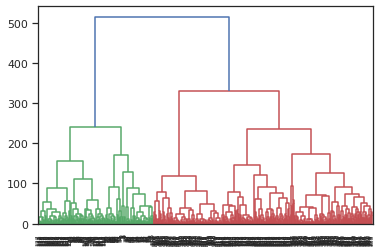

In [351]:
samples = data.values
mergings = linkage(samples, method='complete')

dendrogram(mergings,
           leaf_rotation=90,
           leaf_font_size=6,
           )

plt.show()

###K-mean

In [0]:
from sklearn import datasets
from sklearn.cluster import KMeans

model = KMeans(n_clusters=9)
model.fit(data.values)

all_predictions = model.predict(data.values)

In [353]:
data_cluster = pd.DataFrame(np.c_[data.values, all_predictions])
data_cluster.columns = list(data.columns) + ["class"]
data_cluster

,depth,sr,mr,np,sonic,bd,dr,gmr,class
0,3901.0,190.9700,110.9660,0.0000,78.5960,2.6835,129.1680,68.5535,3.0
1,3902.0,190.9700,109.4040,0.0000,78.5960,2.7045,125.0050,68.5535,3.0
2,3903.0,190.9700,109.4040,0.0000,81.4450,2.7045,116.6830,59.1830,3.0
3,3904.0,190.9700,97.9590,0.0000,76.2650,2.7205,100.0400,59.1830,3.0
4,3905.0,190.9700,101.0775,0.0000,76.2650,2.7460,100.0400,63.8685,3.0
5,3906.0,190.9700,88.0740,0.0000,77.3875,2.6830,92.7550,69.3340,3.0
6,3907.0,190.9700,83.9130,0.0000,93.8770,2.6365,86.5125,102.9110,3.0
7,3908.0,190.9700,89.6300,0.0000,109.4180,2.5470,79.2290,148.5220,3.0
8,3909.0,190.9700,89.1090,0.0000,109.4180,2.4430,70.9070,160.0390,3.0
9,3910.0,190.9700,79.2260,0.0000,109.4180,2.4010,75.0650,152.9770,3.0


###TSNE

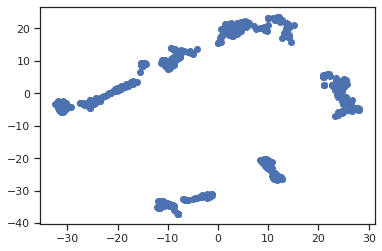

In [354]:
from sklearn import datasets
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

model = TSNE(learning_rate=100)

transformed = model.fit_transform(data)

x_axis = transformed[:, 0]
y_axis = transformed[:, 1]

plt.scatter(x_axis, y_axis)
plt.show()

#Logistic regression

Попробуем создать модель для классификации для других скважин. Позже попробуем протестировать ее на других скажинах

In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

Получим целевые переменные:

In [358]:
rocks = pd.read_csv("Rocks 6406_3-4 - Sheet2.csv", sep=',')
rocks

,"Depth, m\r\n",Name,Description,2nd minerals
0,3931,Sandstones\r\n,medium and coarse-grained,mica
1,4020,Claystones,NaN,Pyrite
2,4027,Sandstones\r\n,medium and coarse-grained,"silstones, mica"
3,4050,intervals fo sandstone and coal,NaN,NaN
4,4060,coal,NaN,NaN
5,4067,Sandstones,NaN,NaN
6,4140,"intervals fo sandstone, claystone, shale",sandstone dominates,"Mica, siderit"
7,4300,poorly sorted Sandstones,Quartz >90%,Bioturbation
8,4375,coarse-grained sandstones,"Shale clasts, coaly plant remains are common",Bioturbation


In [0]:
classes = []
for i in range(3931, 4021):
    classes.append([i, 0])
for i in range(4020, 4028):
    classes.append([i, 1])
for i in range(4027, 4051):
    classes.append([i, 2])
for i in range(4050, 4061):
    classes.append([i, 3])
for i in range(4060, 4068):
    classes.append([i, 4])
for i in range(4067, 4141):
    classes.append([i, 5])
for i in range(4140, 4301):
    classes.append([i, 6])
for i in range(4300, 4376):
    classes.append([i, 7])

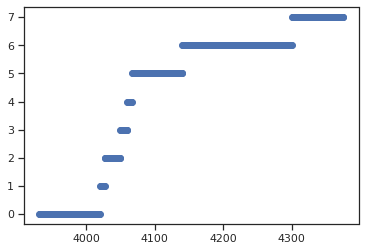

In [360]:
classes = pd.DataFrame(classes, columns=['depth', 'class'])
fig = plt.Figure()
plt.scatter(classes['depth'].values, classes['class'].values)
plt.show()

In [0]:
data_set = classes.merge(data, on='depth')

In [0]:
train_feature_matrix, test_feature_matrix, train_labels, test_labels = train_test_split(
    data_set.drop('class',axis=1), data_set['class'], test_size=0.15, random_state=42)

In [363]:
clf = LogisticRegression(C=1)
clf.fit(train_feature_matrix, train_labels)
y_pred = clf.predict(test_feature_matrix)
accuracy_score(test_labels, y_pred)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


0.7647058823529411

In [364]:
clf = LogisticRegression(solver='saga')


param_grid = {
    'C': np.arange(1, 5),
    'penalty': ['l1', 'l2'],
}

search = GridSearchCV(clf, param_grid, n_jobs=-1, cv=5, refit=True, scoring='accuracy')

search.fit(data_set.drop('class',axis=1), data_set['class'])

print(search.best_params_)

{'C': 1, 'penalty': 'l1'}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


In [365]:
clf = LogisticRegression(C=3, penalty='l1')
clf.fit(train_feature_matrix, train_labels)
y_pred = clf.predict(test_feature_matrix)
accuracy_score(test_labels, y_pred)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.7941176470588235

##Cохранение модели

In [0]:
import pickle
filename = 'finalized_model.sav'
pickle.dump(clf, open(filename, 'wb'))